## E-commerce Customer data

### Objective

"Performed data cleaning and exploratory data analysis (EDA) on e-commerce customer data. Analyzed sales trends, product categories, demographics, churn, returns, and spending patterns to uncover customer behavior insights."

### 1.0 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

#### 1.1 Load the Data

In [2]:
df=pd.read_csv(r"C:\Users\Bindhu\Downloads\ecommerce_customer_data.csv")

In [3]:
# Check the first few entries
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [4]:
# Inspect the shape of the dataset
df.shape

(250000, 13)

In [5]:
# Inspect the different columns in the dataset
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

### 1.2 Check the basic statistics

In [6]:
# Check the summary of the dataset
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


### 1.3 Check the data type of columns

In [7]:
df.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [8]:
# Check the info to see the types of the feature variables and the null values present
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [9]:
df.duplicated().sum()

0

### 2. Data Cleaning

In [10]:
df['Purchase Date'].dtype

dtype('O')

In [11]:
# Convert column to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [12]:
df['Purchase Date'].dtype

dtype('<M8[ns]')

In [15]:
df.dtypes

Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                         float64
Customer Name                    object
Age                               int64
Gender                           object
Churn                             int64
dtype: object

### 2.1 Handle the missing values

2.1 Handle the missing values

In [13]:
# Check the number of missing values in each column
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

2.1.2 Check the percentage of missing values

In [14]:
# Check the percentage of missing values in each column
df.isna().mean()*100

Customer ID               0.0000
Purchase Date             0.0000
Product Category          0.0000
Product Price             0.0000
Quantity                  0.0000
Total Purchase Amount     0.0000
Payment Method            0.0000
Customer Age              0.0000
Returns                  18.9528
Customer Name             0.0000
Age                       0.0000
Gender                    0.0000
Churn                     0.0000
dtype: float64

<Axes: >

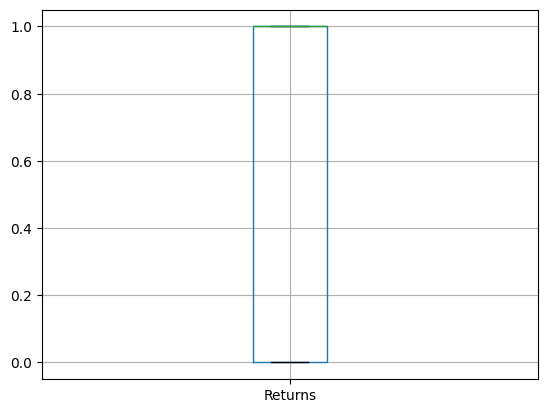

In [15]:
df.boxplot('Returns')

In [16]:
df['Returns'] = df['Returns'].fillna(round(df['Returns'].mean())).astype(int)

In [17]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

### 2.2 Identify and handle redundant values within categorical columns (if any)

Examine the categorical columns to determine if any value or column needs to be treated

In [18]:
df.drop(columns=['Customer Age'],inplace=True)

In [19]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,1,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,1,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,1,Melissa Fernandez,64,Male,0


In [20]:
# Write a function to display the categorical columns with their unique values and check for redundant values
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Product Category:
['Home' 'Electronics' 'Books' 'Clothing']

Unique values in Payment Method:
['PayPal' 'Credit Card' 'Cash']

Unique values in Customer Name:
['John Rivera' 'Lauren Johnson' 'Carol Allen' ... 'Gabriel Williams'
 'Barry Foster' 'Angela Norton']

Unique values in Gender:
['Female' 'Male']


### EDA

In [21]:
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

### 1. Sales Over Time


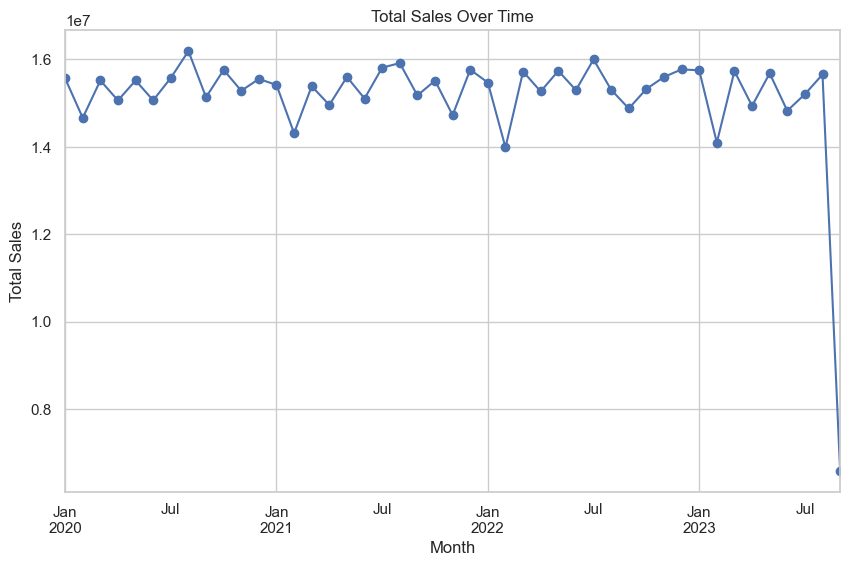

In [22]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
sales_over_time = df.groupby(df['Purchase Date'].dt.to_period('M'))['Total Purchase Amount'].sum()
sales_over_time.plot(kind='line', marker='o', title='Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

### 2. Sales by Product Category

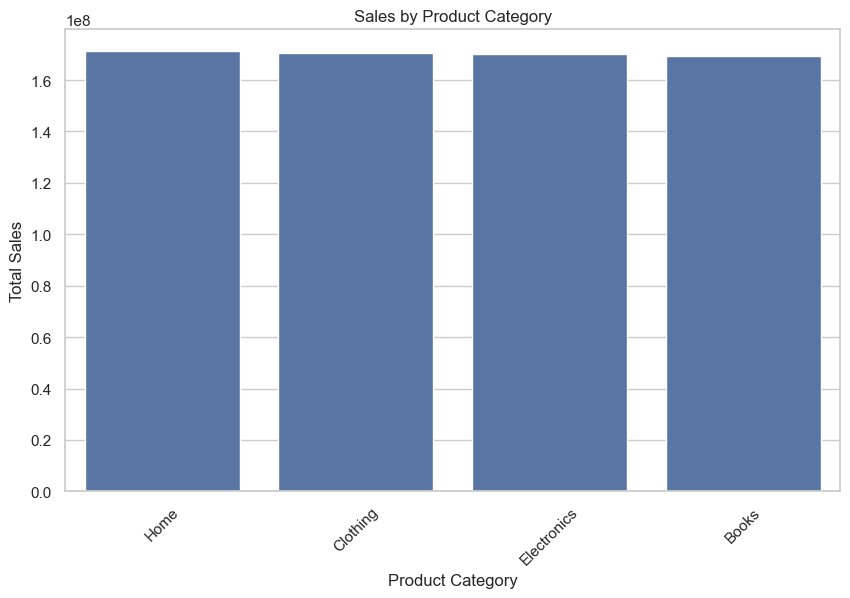

In [23]:
category_sales = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### 3. Quantity Sold by Category

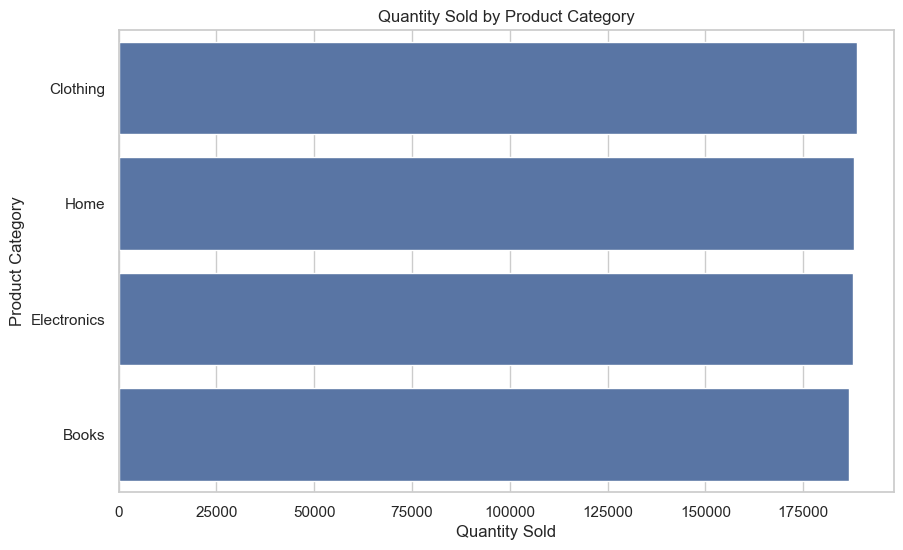

In [24]:
category_quantity = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=category_quantity.values, y=category_quantity.index)
plt.title('Quantity Sold by Product Category')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Category')
plt.show()

### 4. Age Distribution

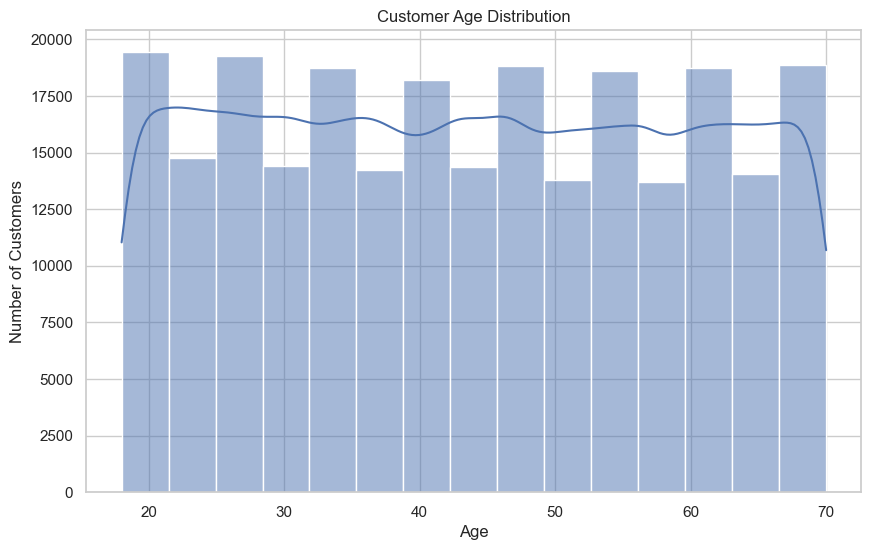

In [25]:
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

### 5. Gender Distribution

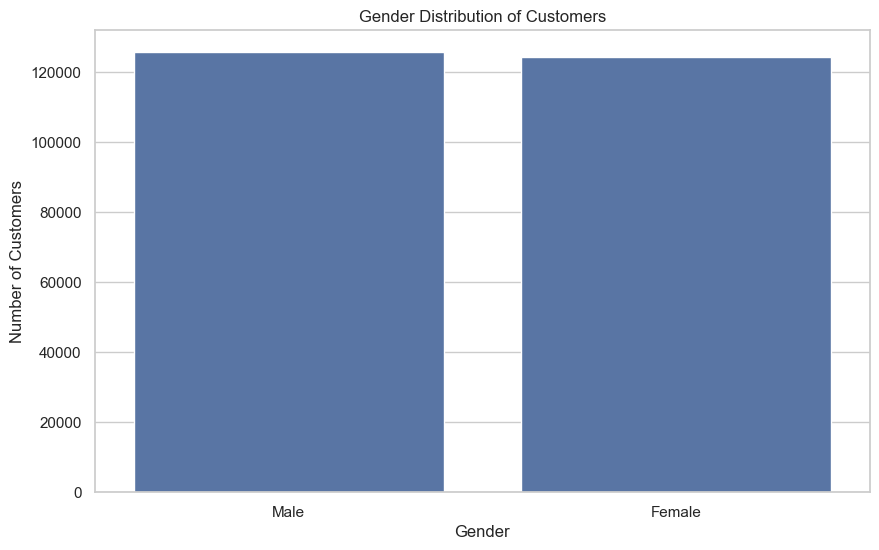

In [39]:
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

### 6. Churn Analysis

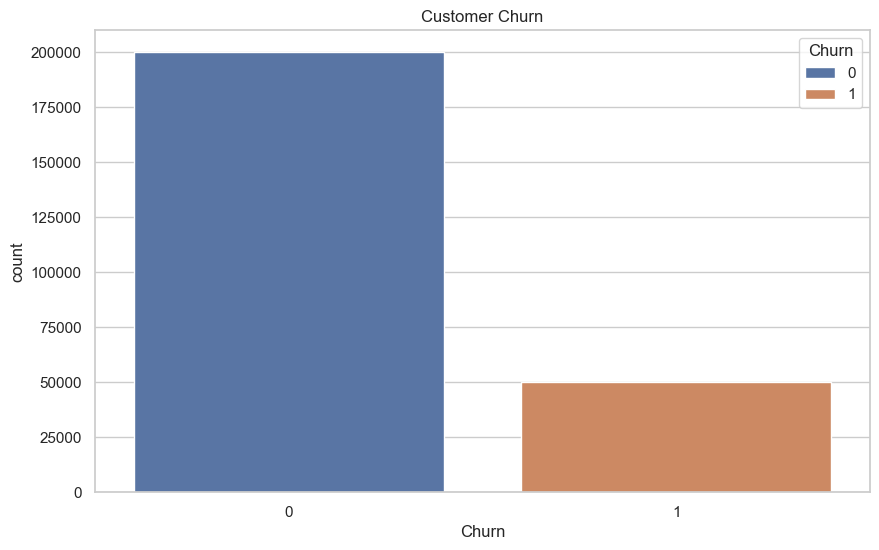

In [37]:
churn_counts = df['Churn'].value_counts()
sns.countplot(x='Churn', data=df,hue='Churn')
plt.title('Customer Churn')
plt.show()

###  7. Returns by Product Category

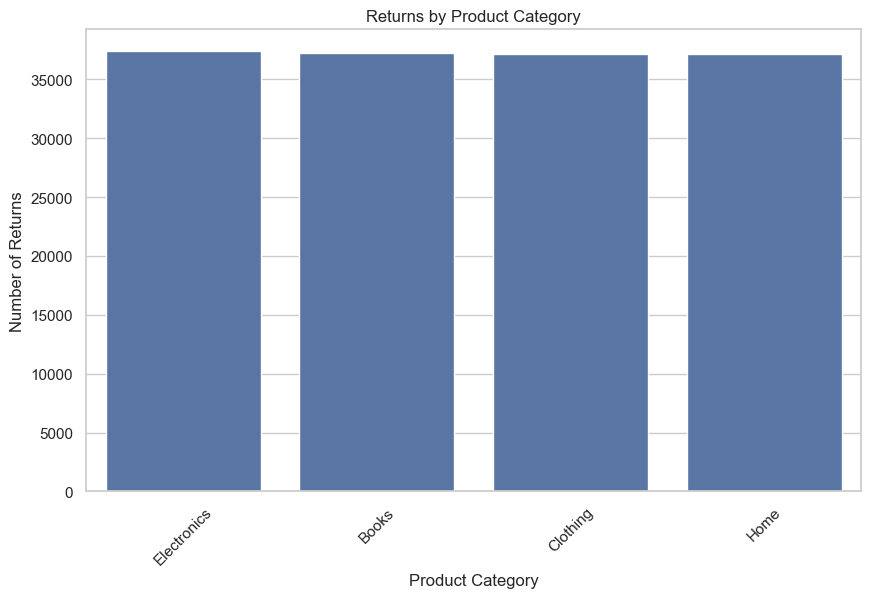

In [28]:
returns_category = df.groupby('Product Category')['Returns'].sum().sort_values(ascending=False)
sns.barplot(x=returns_category.index, y=returns_category.values)
plt.title('Returns by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.show()

### 8. Payment Method Analysis

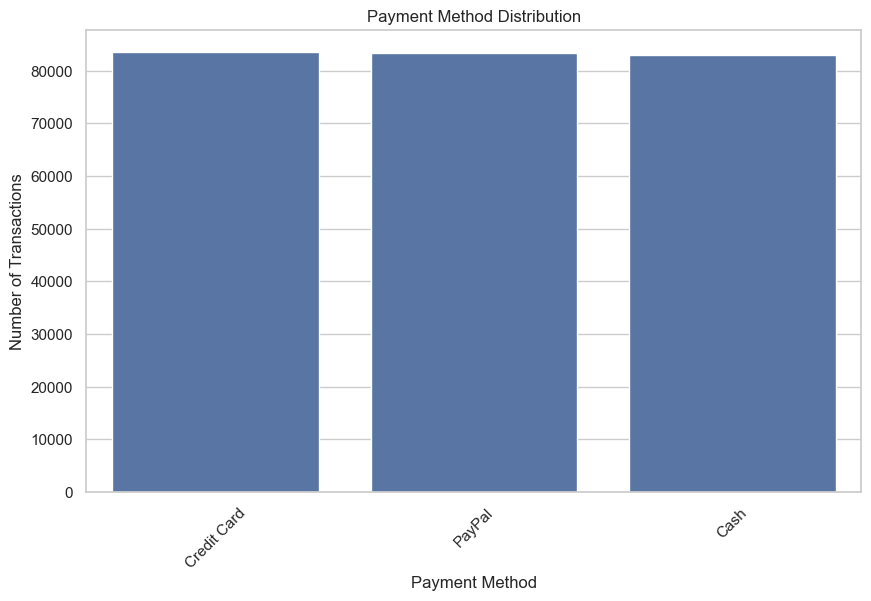

In [29]:
payment_counts = df['Payment Method'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

### 9. Returns by Payment Method

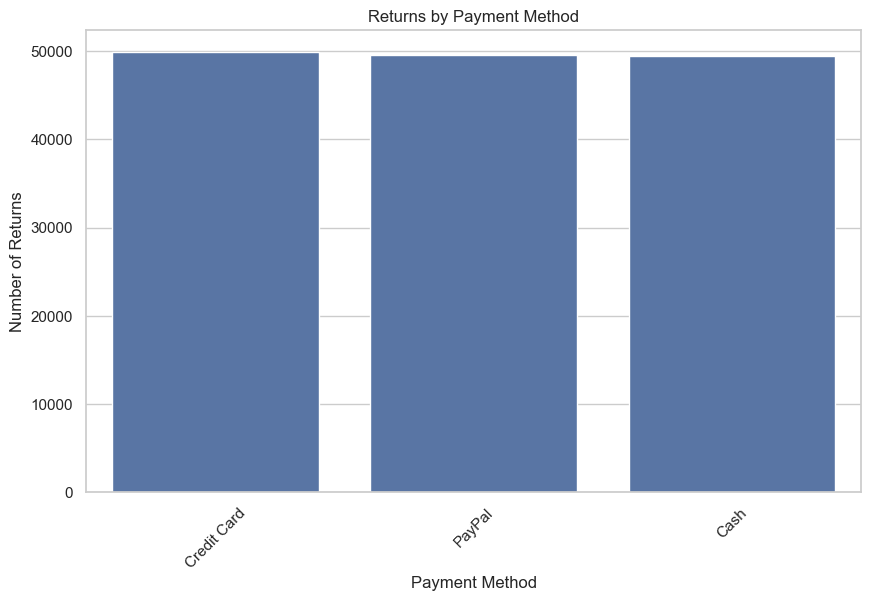

In [30]:
returns_payment = df.groupby('Payment Method')['Returns'].sum().sort_values(ascending=False)
sns.barplot(x=returns_payment.index, y=returns_payment.values)
plt.title('Returns by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.show()

### 10. Total Spend per Customer

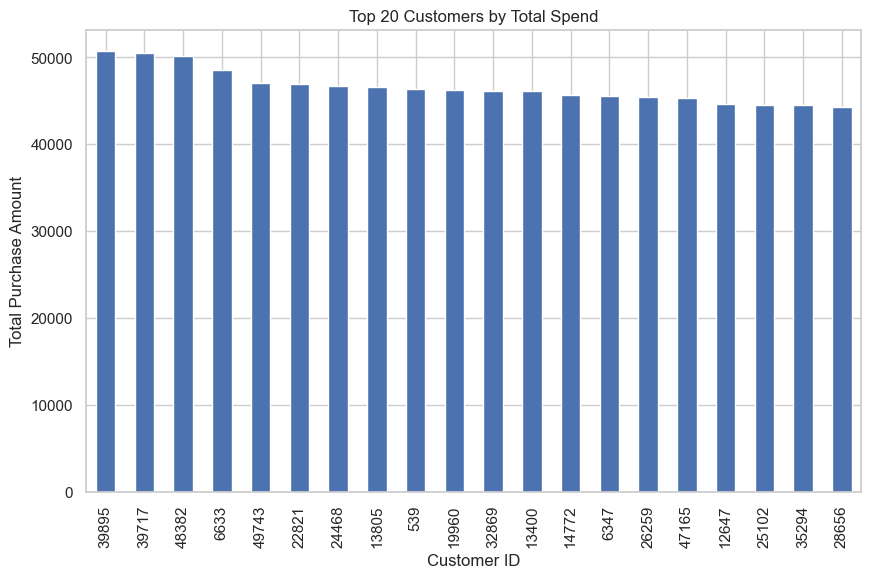

In [31]:
customer_spend = df.groupby('Customer ID')['Total Purchase Amount'].sum().sort_values(ascending=False)
customer_spend.head(20).plot(kind='bar')
plt.title('Top 20 Customers by Total Spend')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount')
plt.show()

### 11. Purchase Frequency per Customer

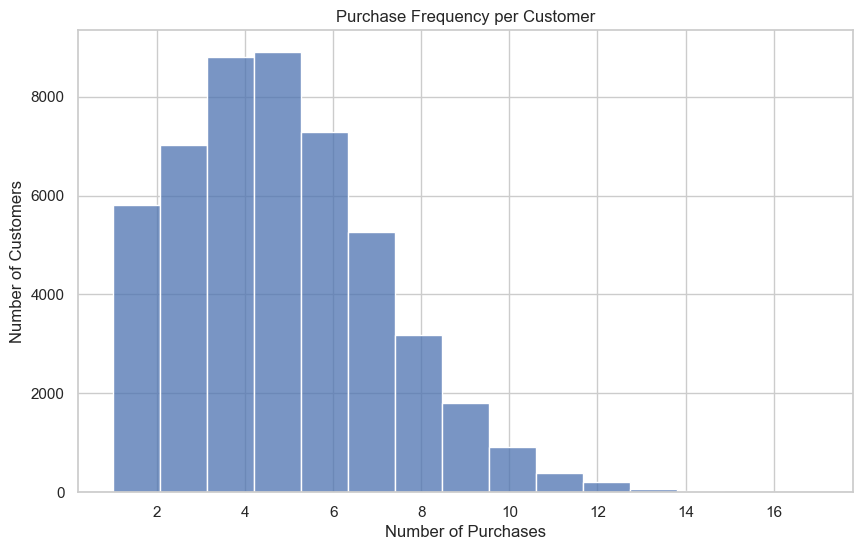

In [32]:
purchase_freq = df['Customer ID'].value_counts()
sns.histplot(purchase_freq, bins=15, kde=False)
plt.title('Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

### 12. Age vs Total Purchase Amount

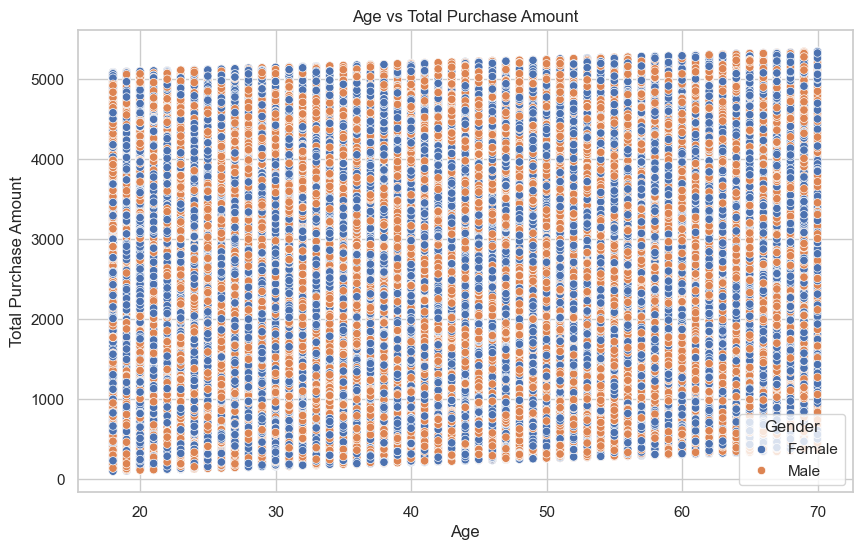

In [33]:
sns.scatterplot(x='Age', y='Total Purchase Amount', data=df, hue='Gender')
plt.title('Age vs Total Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount')
plt.show()

### 13. Returns Trend Over Time

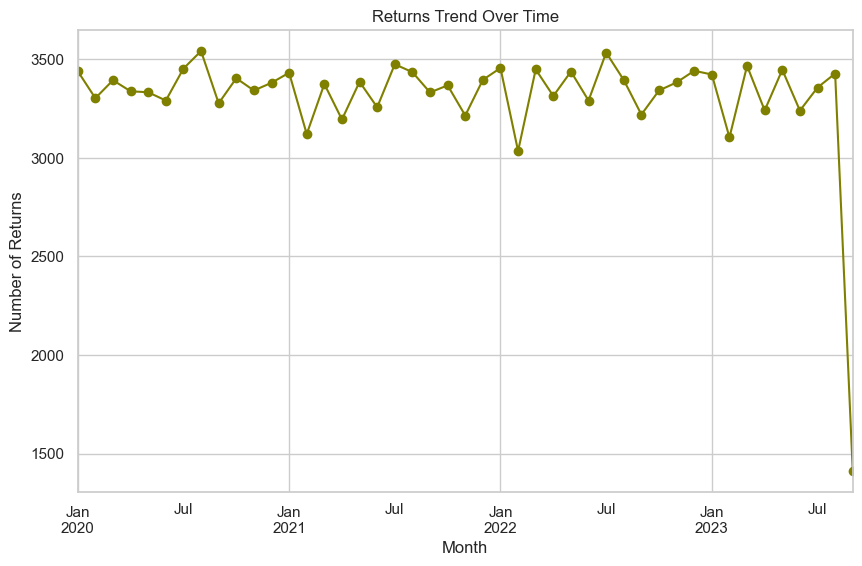

In [34]:
returns_over_time = df.groupby(df['Purchase Date'].dt.to_period('M'))['Returns'].sum()
returns_over_time.plot(kind='line', marker='o', color='olive', title='Returns Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Returns')
plt.show()

In [35]:
sns.pairplot(df)

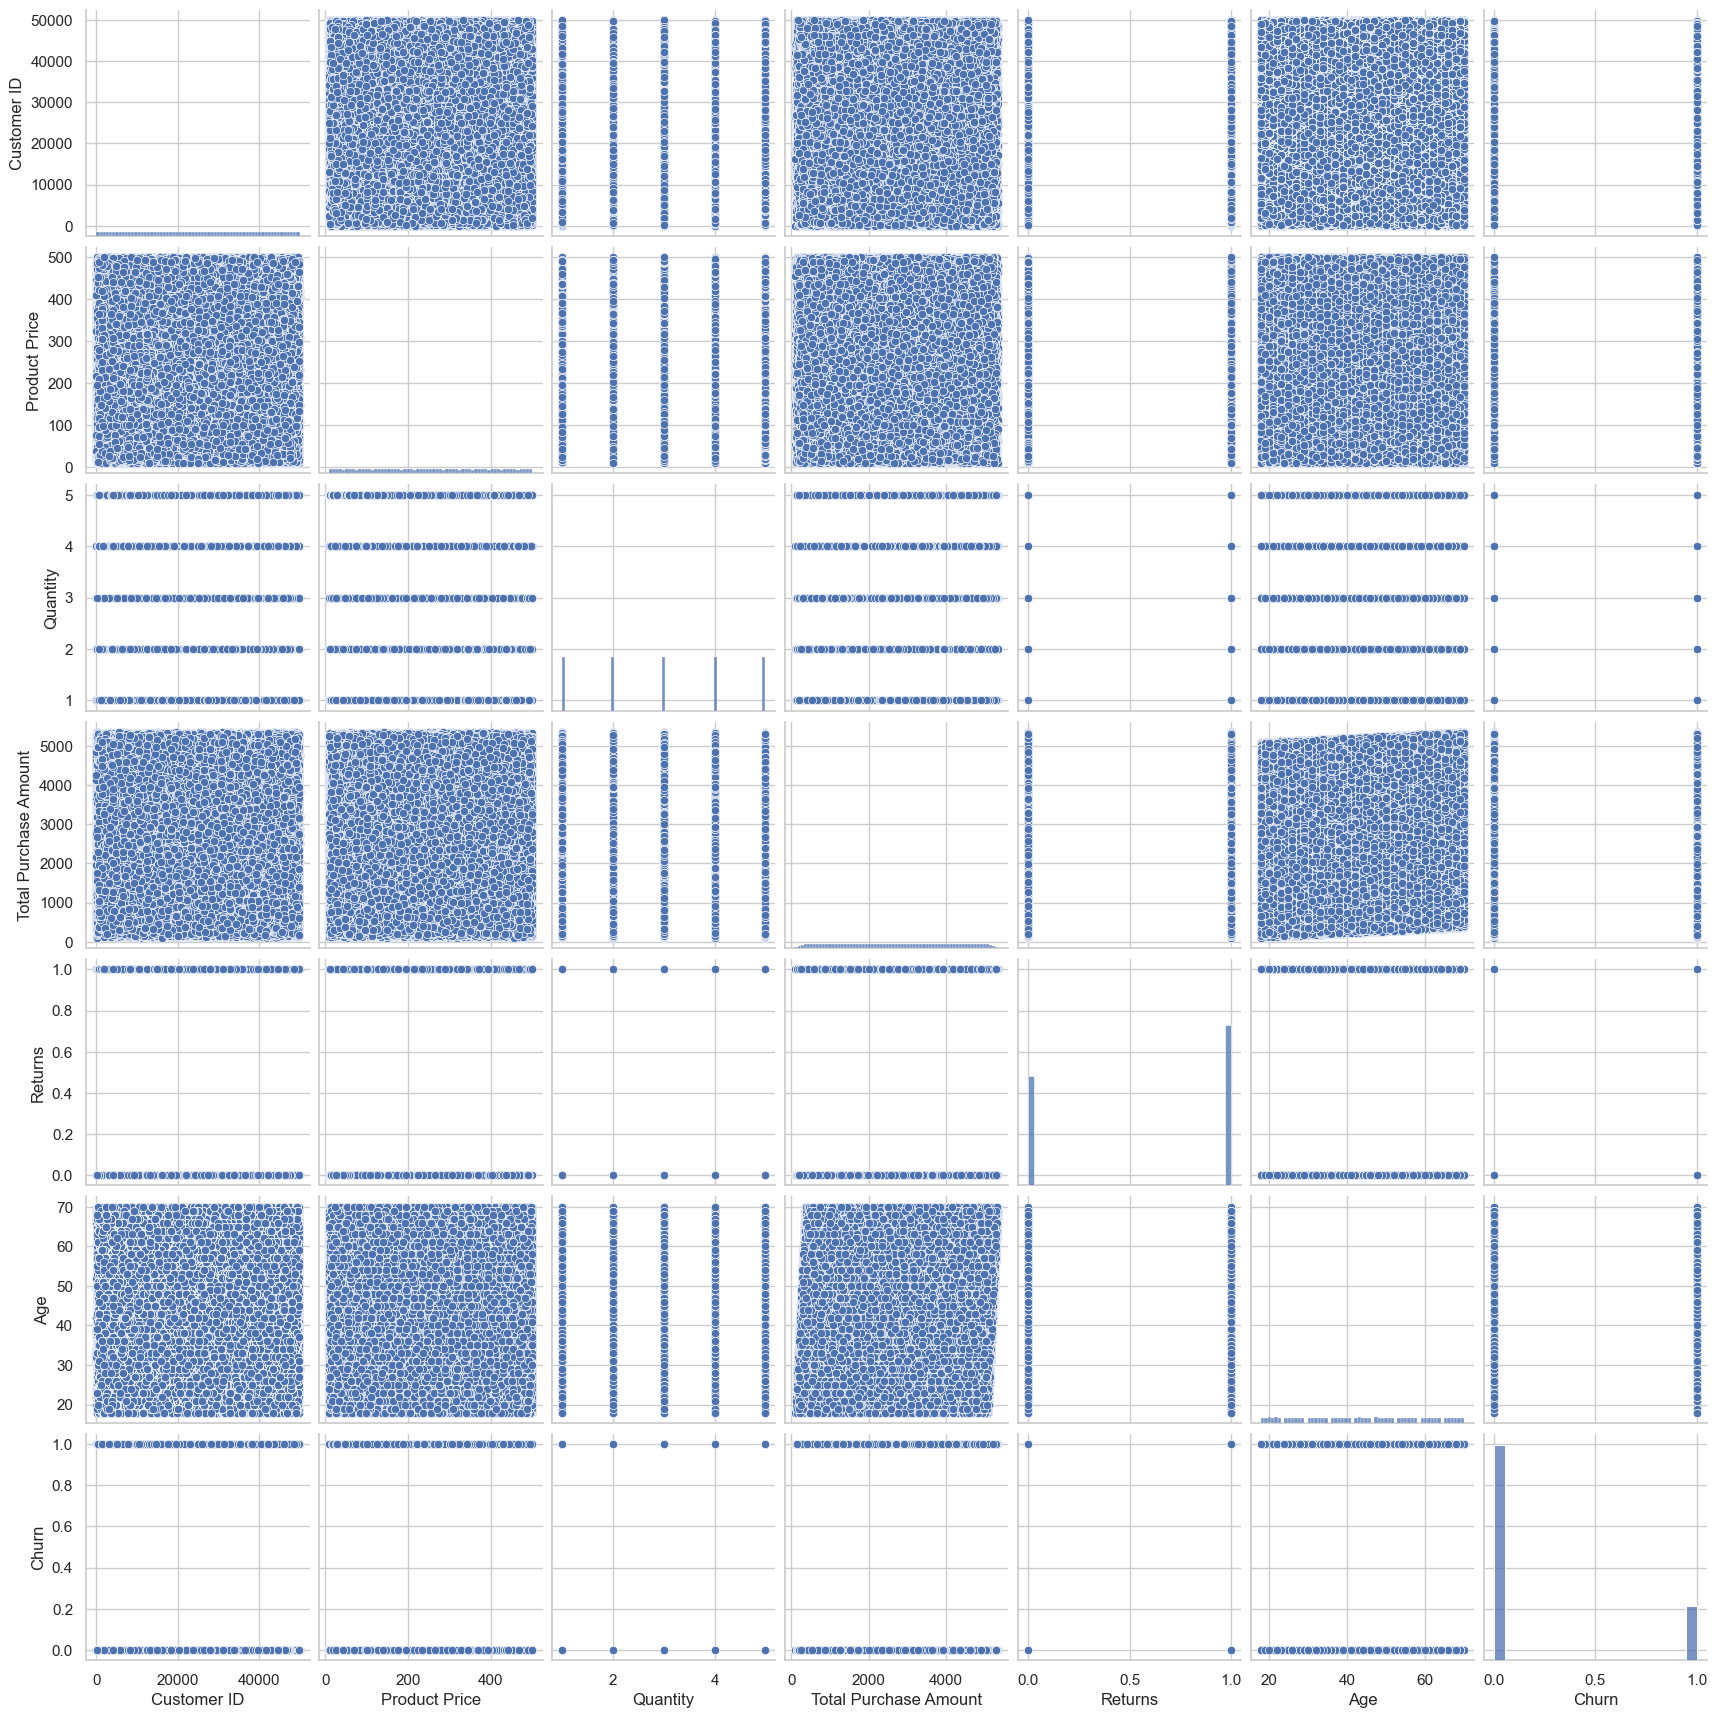

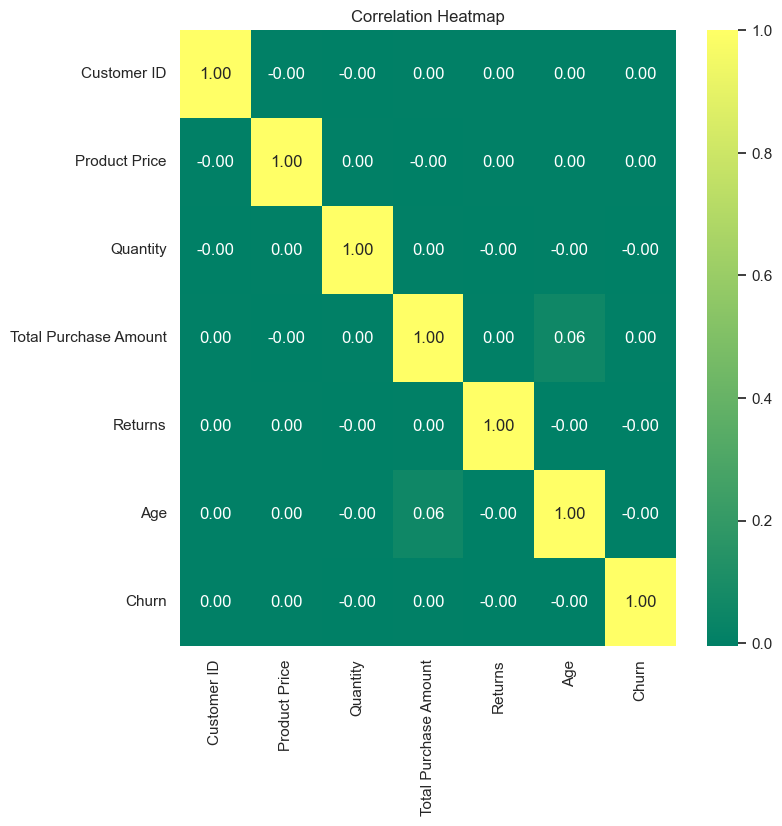

In [36]:
##   Correlation Heatmap 

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='summer', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()